In [1]:
import torch

device = 'cuda'
torch.set_default_device(device)

In [2]:
import string
import unicodedata

allowed_chars = string.ascii_letters + ".,;'"
n_letters = len(allowed_chars)
print(f"{n_letters=}") # 26 + 26 + above 4

# convert the unicode to plain ascii to limit the RNN input layers.
# i.e. converting 'Ślusàrski' to Slusarski
def unicode2ascii(s):
    return "".join(
        c for c in unicodedata.normalize("NFD", s) if unicodedata.category(c) != 'Mn' and c in allowed_chars
    )

n_letters=56


In [3]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [4]:
allowed_chars

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;'"

In [5]:
char2id = {char: id for id, char in enumerate(allowed_chars)}
id2char = {id: char for id, char in enumerate(allowed_chars)}


char2id["R"]

43

In [ ]:
def name2tensor(name):
    name = unicode2ascii(name)
    # That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.
    tensor = torch.zeros(len(name), 1, n_letters)
    for idx, char in enumerate(name):
        tensor[idx, 0, char2id[char]] = 1.0
    return tensor

name2tensor("Hello")

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [8]:
from io import open
import os,time, glob

from torch.utils.data import DataLoader, Dataset 


data_dir = os.path.join(os.path.dirname(os.path.abspath("")) + "/text_data/pytorch-data/names")
print(data_dir)

class NameDataset(Dataset):
    def __init__(self, data_dir):
        super().__init__()
        self.data_dir = data_dir
        self.country_set = set()
        self.data = []
        self.data_tensors = []
        self.labels = []
        self.labels_tensors = []

        print(os.listdir(data_dir))
        for filename in os.listdir(data_dir):
            if filename.endswith(".txt"):
                label = os.path.splitext(filename)[0]
                self.country_set.add(label)
                lines = open(os.path.join(data_dir, filename), encoding='utf-8').read().strip().split('\n')
                for name in lines:
                    self.data.append(name)
                    self.data_tensors.append(name2tensor(name))
                    self.labels.append(label)
        
        self.labels_uniq = sorted(list(self.country_set))
        for idx in range(len(self.labels)):
            t = torch.tensor(
                [self.labels_uniq.index(self.labels[idx])], dtype=torch.long
            )
            self.labels_tensors.append(t)
        
        print(f"{len(self.data)=} | {len(self.labels_uniq)=}")

    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        data_item = self.data[index]
        data_tenosr = self.data_tensors[index]
        label = self.labels[index]
        label_tensor = self.labels_tensors[index]
        return data_item, data_tenosr, label, label_tensor



/home/nand-ml/text_data/pytorch-data/names


In [22]:
alldata = NameDataset(data_dir=data_dir)
alldata

['Vietnamese.txt', 'Spanish.txt', 'Polish.txt', 'English.txt', 'Portuguese.txt', 'Korean.txt', 'French.txt', 'German.txt', 'Chinese.txt', 'Dutch.txt', 'Russian.txt', 'Arabic.txt', 'Czech.txt', 'Japanese.txt', 'Italian.txt', 'Scottish.txt', 'Greek.txt', 'Irish.txt']
len(self.data)=20074 | len(self.labels_uniq)=18


In [10]:
alldata.__getitem__(2)

('Le',
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]]], device='cuda:0'),
 'Vietnamese',
 tensor([17], device='cuda:0'))

In [11]:
train_data, test_data = torch.utils.data.random_split(alldata, [0.9, 0.1], generator=torch.Generator(device))

In [12]:
from torch import nn
import torch.nn.functional as F

class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.rnn = nn.RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        rnn_out, hidden = self.rnn(x)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output

rnn_model = CharRNN(input_size=n_letters, hidden_size=128, output_size=len(alldata.labels_uniq))
rnn_model

CharRNN(
  (rnn): RNN(56, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [13]:
import numpy as np
import random

def train(rnn, train_data, n_epoch, n_batch_size, report_every, lr, criteria=nn.NLLLoss()):
    current_loss = 0
    all_loss = []
    rnn.train()

    optimizer = torch.optim.SGD(rnn.parameters(), lr=lr)
    
    for iter in range(n_epoch):
        rnn.zero_grad()

        batches = list(range(len(train_data)))
        random.shuffle(batches)
        batches = np.array_split(batches, len(batches)//n_batch_size)

        for idx, batch in enumerate(batches):
            batch_loss = 0
            for i in batch:
                text, text_tensor, label, label_tensor = train_data[i]
                output = rnn(text_tensor)
                loss = criteria(output, label_tensor)
                batch_loss += loss
            
            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += batch_loss.item() / len(batch)

        all_loss.append(current_loss / len(batches))
        current_loss = 0
        
        if iter % report_every == 0:
            print(f"{iter} | Avg Batch Loss: {all_loss[-1]}")
    
    return all_loss

all_loss = train(rnn=rnn_model, train_data=train_data, n_epoch=2000, n_batch_size=256, report_every=1, lr=0.01)

0 | Avg Batch Loss: 2.063053447756157
1 | Avg Batch Loss: 1.6724160305582927
2 | Avg Batch Loss: 1.586212941358058
3 | Avg Batch Loss: 1.5307260632952788
4 | Avg Batch Loss: 1.4928923983213387
5 | Avg Batch Loss: 1.464869631881843
6 | Avg Batch Loss: 1.4390192430159454
7 | Avg Batch Loss: 1.4195690840486408
8 | Avg Batch Loss: 1.3949401809276851
9 | Avg Batch Loss: 1.3772524020236114
10 | Avg Batch Loss: 1.363679164570911
11 | Avg Batch Loss: 1.3428639156790245
12 | Avg Batch Loss: 1.3219256029116921
13 | Avg Batch Loss: 1.305257374763126
14 | Avg Batch Loss: 1.2870252368808763
15 | Avg Batch Loss: 1.2679274998190635
16 | Avg Batch Loss: 1.2549102140561599
17 | Avg Batch Loss: 1.2378811451762814
18 | Avg Batch Loss: 1.2223350583522994
19 | Avg Batch Loss: 1.2071475683152657
20 | Avg Batch Loss: 1.1931281115084689
21 | Avg Batch Loss: 1.1799755184399146
22 | Avg Batch Loss: 1.1685057210146057
23 | Avg Batch Loss: 1.1576351105862284
24 | Avg Batch Loss: 1.1461060898460065
25 | Avg Batch 

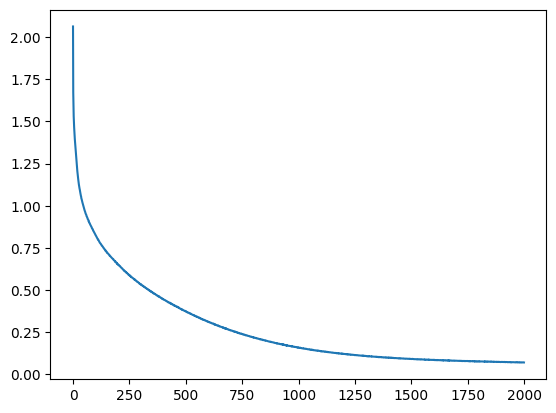

In [14]:
# 0 | Avg Batch Loss: 1.1268274072430502
# 1 | Avg Batch Loss: 1.1040223765624901
# 2 | Avg Batch Loss: 1.0846506534705973
# 3 | Avg Batch Loss: 1.0697757065496067
# 4 | Avg Batch Loss: 1.0544799710029202
# 5 | Avg Batch Loss: 1.044901974942844
# 6 | Avg Batch Loss: 1.0331765818283922
# 7 | Avg Batch Loss: 1.0211468229188174
# 8 | Avg Batch Loss: 1.0129267906820185
# 9 | Avg Batch Loss: 1.0031886025956023
# 10 | Avg Batch Loss: 0.9959624254478721
# 11 | Avg Batch Loss: 0.9874486710215303
# 12 | Avg Batch Loss: 0.9809969861319056
# 13 | Avg Batch Loss: 0.9731676988567867
# 14 | Avg Batch Loss: 0.9668263209463182
# 15 | Avg Batch Loss: 0.9577941793863006
# 16 | Avg Batch Loss: 0.9513112227259621
# 17 | Avg Batch Loss: 0.9454300620431485
# 18 | Avg Batch Loss: 0.938885802420194
# 19 | Avg Batch Loss: 0.9326186257451028

import matplotlib.pylab as plt

xs = [x for x in range(len(all_loss))]
plt.plot(xs, all_loss)
plt.show()
plt.close()

In [15]:
test_data[0]

('Winter',
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 

In [16]:
def output2name(output_tensor, labels=alldata.labels_uniq):
    top_pred, top_pred_id = output_tensor.topk(1)
    label_id = top_pred_id.item()
    return labels[label_id]


a = rnn_model(name2tensor("Messi"))
output2name(a)

'Italian'

In [17]:
correct_pred_count = 0
n_test_data = len(test_data)

for each in test_data:
    word, word_tensor, label, label_tensor = each
    pred = output2name(rnn_model(name2tensor(word)))
    # print(word, label, pred)
    if label == pred:
        correct_pred_count += 1

print(f"{correct_pred_count=}")
print(f"{n_test_data=}")
print(f"Accuracy: {correct_pred_count/n_test_data}")

correct_pred_count=1530
n_test_data=2007
Accuracy: 0.7623318385650224


In [18]:
# Confusion Matrix: Indicating for every actual language (rows) whihc language the model guesses (columns)

confusion = torch.zeros(len(alldata.labels_uniq), len(alldata.labels_uniq))

for each in test_data:
    word, word_tensor, label, label_tensor = each

    pred = output2name(rnn_model(name2tensor(word)))
    # print(word, label, pred)
    # if label == pred:
    #     correct_pred_count += 1
    pred_tensor = alldata.labels_uniq.index(pred)

    confusion[label_tensor.item()][pred_tensor] += 1

confusion

tensor([[217.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  12.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   0.,  15.,   0.,  13.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,
           2.,   0.,  11.,   0.,   2.,   0.],
        [  0.,   0.,   2.,  17.,   7.,   0.,   3.,   1.,   0.,   0.,   2.,   0.,
           0.,   0.,   4.,   0.,   0.,   0.],
        [  4.,   3.,   9.,   8., 259.,  10.,  23.,   0.,  13.,   4.,   1.,   0.,
           0.,   1.,  36.,   8.,   5.,   0.],
        [  0.,   0.,   0.,   1.,  11.,   9.,   1.,   0.,   0.,   1.,   0.,   0.,
           0.,   0.,   4.,   1.,   1.,   0.],
        [  0.,   0.,   3.,   9.,  23.,   0.,  24.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,  13.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   4.,   0.,   1.,  11.,   0.,   0.,   0.,   0.,
           0.,   0.,   5.,   0

In [19]:
confusion[0] = confusion[0] / sum(confusion[0])

for row_idx in range(len(confusion)):
    row_sum = sum(confusion[row_idx])
    if row_sum > 0:
        confusion[row_idx] /= row_sum

confusion

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7059, 0.0000, 0.0000, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0204, 0.0000, 0.3061, 0.0000, 0.2653, 0.0000, 0.0816, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0204, 0.0408, 0.0000, 0.2245, 0.0000, 0.0408, 0.0000],
        [0.0000, 0.0000, 0.0556, 0.4722, 0.1944, 0.0000, 0.0833, 0.0278, 0.0000,
         0.0000, 0.0556, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000, 0.0000, 0.0000],
        [0.0104, 0.0078, 0.0234, 0.0208, 0.6745, 0.0260, 0.0599, 0.0000, 0.0339,
         0.0104, 0.0026, 0.0000, 0.0000, 0.0026, 0.0938, 0.0208, 0.0130, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0345, 0.3793, 0.3103, 0.0345, 0.0000, 0.0000,
         0.0345, 0.0000, 0.0000, 0.0000, 0.0000, 0.1379, 0.0345, 0.0345, 0.0000],
        [0.0000, 0.000

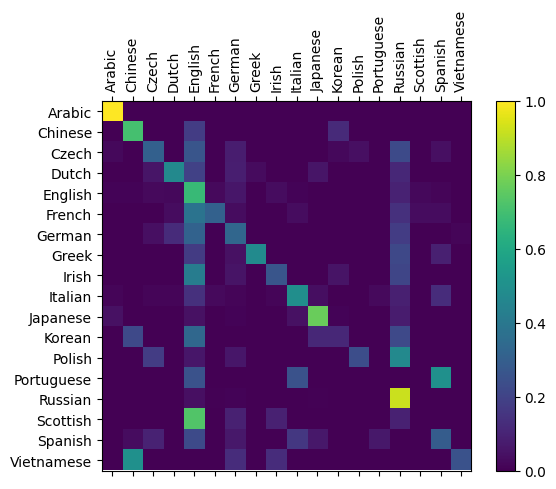

In [20]:
classes = alldata.labels_uniq

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.cpu().numpy())
fig.colorbar(cax)

ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)
ax.set_yticks(np.arange(len(classes)), labels=classes)

# ax.xaxis.set_major_locator(ticker.MultiLocator(1))
# ax.yaxis.set_major_locator(ticker.MultiLocator(1))

plt.show()

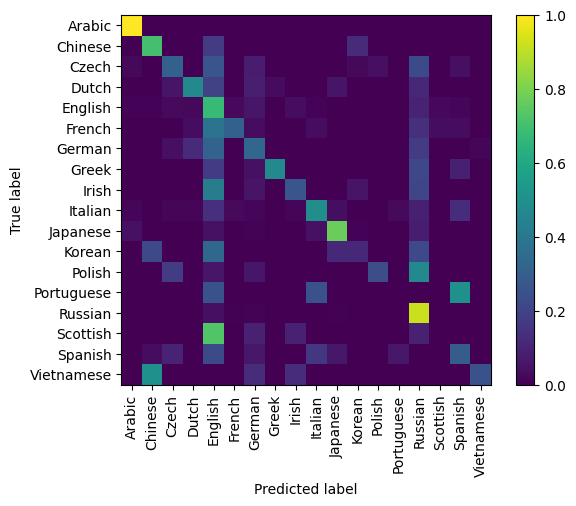

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion.cpu().numpy(), display_labels=classes, )
disp.plot(include_values=False, xticks_rotation='vertical')
plt.show()